In [1]:
import csv
import glob
import torch
from torch import tensor, nn
import pandas as pd
from typing import Callable
import sys
import seaborn as sns

RESULTS_PATTERN = "/nethome/abambhaniya3/synergy3/Google-MoE/MoE_Expert_Scheduler/Modelling Notebooks/Dataset-Switch_t_32E_CNN_dailymail/*.csv"
csv.field_size_limit(sys.maxsize)

131072

In [2]:
## Library and inputs
import plotly.express as px
import pandas as pd
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import numpy as np

import plotnine as p9
from plotnine import ggplot, aes, geom_point, geom_line, labs, element_text

In [113]:
df_router_logits = pd.read_csv('SwitchT_logits.csv')
top_experts_selected = pd.read_csv('SwitchT_top2_experts.csv')

In [114]:
df_router_logits

,Unnamed: 0,Layer_0_expert_0,Layer_0_expert_1,Layer_0_expert_2,Layer_0_expert_3,Layer_0_expert_4,Layer_0_expert_5,Layer_0_expert_6,Layer_0_expert_7,Layer_0_expert_8,...,Layer_5_expert_22,Layer_5_expert_23,Layer_5_expert_24,Layer_5_expert_25,Layer_5_expert_26,Layer_5_expert_27,Layer_5_expert_28,Layer_5_expert_29,Layer_5_expert_30,Layer_5_expert_31
0,0,0.5770,0.1647,1.8181,0.7679,-1.0883,-0.6067,-3.2795,-3.0298,0.9483,...,-167.7608,-0.8419,24.882200,272.4868,140.4933,223.1450,110.0844,224.38890,117.79350,-104.4994
1,1,1.0750,1.0891,0.6393,-0.9760,0.4585,-1.7404,0.3299,-2.7483,0.3887,...,39.5772,3.9742,-54.127100,21.1262,12.6704,-97.9383,-11.7773,-26.33110,4.28130,-24.1951
2,2,0.4857,1.2122,0.8361,-1.0925,-0.6158,-3.2056,-0.9702,-2.8043,0.0589,...,12.1481,0.6309,-38.485200,3.9079,-2.5592,-62.6547,17.6262,3.04640,17.93090,112.7942
3,3,0.5801,1.3160,1.7084,0.0177,-0.4801,-4.6985,-1.7977,-1.8499,0.8021,...,-1.5883,-31.7500,-41.785000,38.0640,-6.5914,-90.6570,28.4220,-32.97700,1.78550,-2.4007
4,4,0.6474,0.9938,0.0382,-0.8350,-0.0077,-5.3167,-2.1439,-5.2511,1.3653,...,44.6620,21.1590,60.041000,-36.9360,-80.6870,-49.4950,56.9020,-65.89200,-0.80229,-99.8770
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
448889,47,0.0908,0.3498,0.6925,-1.0529,-0.0995,-2.9576,-0.7797,1.7129,-0.2855,...,-5.6960,-37.2780,-0.031066,-19.0280,-23.4440,-21.7880,-44.9150,0.31507,19.81500,-35.3140
448890,48,0.1293,0.6290,1.0189,-0.1602,-0.9959,-4.6028,-1.7702,-3.7432,1.1156,...,14.8729,-47.3401,83.414100,-13.8600,-37.9370,151.0105,-44.6186,-45.86290,-2.54050,-60.9304
448891,49,0.6375,0.7818,0.7847,0.3058,-1.5390,-3.3042,-1.9848,-3.4225,0.1309,...,27.6972,-43.1067,37.354400,90.0560,-54.9734,38.0053,0.6290,-63.90990,2.25750,-50.0286
448892,50,0.5047,0.8332,0.9296,0.3724,0.4148,-3.5482,-2.3384,-5.0306,0.2205,...,11.5182,-59.8939,186.672600,13.9817,-73.0678,-68.7651,-56.9794,-10.87600,20.48000,-56.4931


In [115]:
top_experts_selected
import ast
def str_to_list(s):
    return ast.literal_eval(s)

top_experts_selected['layer_0_topk_experts'] = top_experts_selected['layer_0_topk_experts'].apply(str_to_list)
top_experts_selected['layer_1_topk_experts'] = top_experts_selected['layer_1_topk_experts'].apply(str_to_list)
top_experts_selected['layer_2_topk_experts'] = top_experts_selected['layer_2_topk_experts'].apply(str_to_list)
top_experts_selected['layer_3_topk_experts'] = top_experts_selected['layer_3_topk_experts'].apply(str_to_list)
top_experts_selected['layer_4_topk_experts'] = top_experts_selected['layer_4_topk_experts'].apply(str_to_list)
top_experts_selected['layer_5_topk_experts'] = top_experts_selected['layer_5_topk_experts'].apply(str_to_list)

In [116]:
temp = df_router_logits.loc[:10]
data_combined = top_experts_selected[['id',	'num_output_tokens',	'Generated Token Num',	'sequences']]

In [7]:
# Assuming your original DataFrame is named df
# Create a new DataFrame with 12 columns
for i in range(6):
    cols_to_combine = [col for col in df_router_logits.columns if col.startswith(f'Layer_{i}_expert_')]
    layer_logits = df_router_logits[cols_to_combine].values.tolist()
    # print(layer_logits)
    layer_softmax = torch.nn.functional.softmax(torch.tensor(layer_logits), dim=1).tolist()
    data_combined.loc[:, f'Layer_{i}_logits'] = pd.Series(layer_logits)
    data_combined.loc[:, f'Layer_{i}_softmax'] = pd.Series(layer_softmax)
        # router_probabilities = 
# Display the new DataFrame
display(data_combined)


/tmp/ipykernel_72843/644220173.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/tmp/ipykernel_72843/644220173.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/tmp/ipykernel_72843/644220173.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/tmp/ipykernel_72843/6442

,id,num_output_tokens,Generated Token Num,sequences,Layer_0_logits,Layer_0_softmax,Layer_1_logits,Layer_1_softmax,Layer_2_logits,Layer_2_softmax,Layer_3_logits,Layer_3_softmax,Layer_4_logits,Layer_4_softmax,Layer_5_logits,Layer_5_softmax
0,f001ec5c4704938247d27a44948eebb37ae98d01,43,0,tensor(0),"[0.577, 0.1647, 1.8181, 0.7679, -1.0883, -0.60...","[0.00017797466716729105, 0.0001178415695903822...","[6.8496, 3.7458, 0.2629, -0.5298, 0.2222, 6.40...","[0.1308346390724182, 0.005871642846614122, 0.0...","[-2.5249, -1.3921, -25.9126, 0.5943, -5.6945, ...","[8.153157864398963e-07, 2.5310146156698465e-06...","[26.182, 5.3099, 11.535, 0.026163, -41.735, -3...","[0.4972374141216278, 4.284758936545785e-10, 2....","[-13.9575, -0.8485, 23.3402, 28.189, 34.3741, ...","[1.944990709234939e-22, 9.595870823321458e-17,...","[188.4609, -91.7042, 64.5732, 210.676, 48.0211...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0320956342533..."
1,f001ec5c4704938247d27a44948eebb37ae98d01,43,1,tensor(32099),"[1.075, 1.0891, 0.6393, -0.976, 0.4585, -1.740...","[0.08662574738264084, 0.08785581588745117, 0.0...","[1.1964, -0.8084, -0.9665, -1.6851, 0.0428, -0...","[0.11401671916246414, 0.015356596559286118, 0....","[-2.115, 0.12934, -8.1185, 2.7409, -1.4481, -1...","[0.0003634649037849158, 0.003428995842114091, ...","[1.2724, 2.2549, 2.9332, 2.1437, -46.4984, 5.3...","[0.0006499391165561974, 0.001736069330945611, ...","[16.681, 6.091, -5.8851, 3.6432, -11.9858, 5.9...","[0.08793048560619354, 2.2128949694888433e-06, ...","[-45.4034, -8.1244, -49.6903, -7.9915, 20.1342...","[1.2398390616032773e-37, 1.920572422370698e-21..."
2,f001ec5c4704938247d27a44948eebb37ae98d01,43,2,tensor(5),"[0.4857, 1.2122, 0.8361, -1.0925, -0.6158, -3....","[0.03305137902498245, 0.06834465265274048, 0.0...","[2.9692, -0.9402, -1.4362, -2.0947, -1.2176, 0...","[0.12147282063961029, 0.002435837872326374, 0....","[-5.1011, -0.010402, 30.73, 2.821, 1.0059, -5....","[2.746317719525877e-16, 4.462856679262467e-14,...","[-3.3459, 0.8596, 0.5702, 2.5488, -34.5128, 2....","[6.864614432444682e-10, 4.603004910563868e-08,...","[13.1703, -13.4242, -11.4879, 0.9001, -9.2705,...","[1.9856434205212103e-12, 5.598297747598829e-24...","[5.0919, -32.767, 6.9569, -13.8133, -22.5358, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 1.0229478789571165e-..."
3,f001ec5c4704938247d27a44948eebb37ae98d01,43,3,tensor(41),"[0.5801, 1.316, 1.7084, 0.0177, -0.4801, -4.69...","[0.027416503056883812, 0.057228099554777145, 0...","[-0.8309, 0.3507, -2.7253, -4.1733, -2.2884, 0...","[0.0005170771619305015, 0.0016854573041200638,...","[-4.1353, -1.9603, -13.528, 5.2791, -1.6488, 0...","[1.5303527334253886e-08, 1.3470463500198093e-0...","[-0.096056, -1.1963, -2.8056, 4.3549, -10.446,...","[6.02335344473098e-20, 2.0045137254244277e-20,...","[2.1126, 3.8783, -17.1018, -18.8211, -12.0291,...","[6.222006393272565e-34, 3.6371800901677666e-33...","[191.27, -39.259, -26.518, 2.4999, -13.798, -6...","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,f001ec5c4704938247d27a44948eebb37ae98d01,43,4,tensor(254),"[0.6474, 0.9938, 0.0382, -0.835, -0.0077, -5.3...","[0.046820174902677536, 0.06620223075151443, 0....","[-0.783, 1.448, -3.4728, -4.6638, -1.2828, 2.4...","[0.0007470831042155623, 0.0069547235034406185,...","[-3.7873, -0.1764, -24.4404, 4.5526, -7.3355, ...","[2.6811392217496177e-08, 9.920036063704174e-07...","[2.7463, -1.4031, -1.8466, 5.5043, -49.0414, 2...","[9.154405705702473e-11, 1.4440065896487164e-12...","[28.2009, -9.534, -9.8434, -7.9556, -5.8607, 4...","[2.1609775865592628e-16, 8.842887679510976e-33...","[82.677, -94.356, -0.074961, -107.47, -88.029,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
448889,d75cef6cb7025d22eb308d39b5ae29e480902c91,52,47,tensor(6),"[0.0908, 0.3498, 0.6925, -1.0529, -0.0995, -2....","[0.0369948111474514, 0.0479317232966423, 0.067...","[2.5686, -1.0084, -0.8149, -2.286, -2.2991, 0....","[0.04520215466618538, 0.0012638275511562824, 0...","[-0.

### Softmax correlation

In [8]:
# Assuming your original DataFrame is named df
df_router_softmax = pd.DataFrame()
# Create a new DataFrame with 12 columns
for i in range(6):
    new_columns = []
    for j in range(32):
        new_columns.append(f'Layer_{i}_expert_{j}')
    new_df = data_combined[f'Layer_{i}_softmax'].apply(pd.Series)
    new_df.columns = new_columns

    # print(new_df)
    df_router_softmax = pd.concat([df_router_softmax, new_df], axis = 1)

# Display the new DataFrame
display(df_router_softmax)


,Layer_0_expert_0,Layer_0_expert_1,Layer_0_expert_2,Layer_0_expert_3,Layer_0_expert_4,Layer_0_expert_5,Layer_0_expert_6,Layer_0_expert_7,Layer_0_expert_8,Layer_0_expert_9,...,Layer_5_expert_22,Layer_5_expert_23,Layer_5_expert_24,Layer_5_expert_25,Layer_5_expert_26,Layer_5_expert_27,Layer_5_expert_28,Layer_5_expert_29,Layer_5_expert_30,Layer_5_expert_31
0,0.000178,0.000118,0.000616,0.000215,0.000034,0.000054,0.000004,0.000005,0.000258,0.000002,...,0.000000e+00,0.000000e+00,0.000000e+00,4.868103e-19,0.000000e+00,1.813406e-40,0.000000e+00,6.290919e-40,0.000000e+00,0.000000e+00
1,0.086626,0.087856,0.056031,0.011141,0.046763,0.005187,0.041120,0.001893,0.043610,0.044948,...,9.999392e-01,3.449744e-16,2.017029e-41,9.700747e-09,2.062992e-12,0.000000e+00,4.977345e-23,2.378820e-29,4.689840e-16,2.013795e-28
2,0.033051,0.068345,0.046921,0.006820,0.010985,0.000824,0.007707,0.001231,0.021569,0.064332,...,1.961818e-44,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.667725e-42,0.000000e+00,6.329665e-42,1.000000e+00
3,0.027417,0.057228,0.084728,0.015623,0.009497,0.000140,0.002543,0.002414,0.034231,0.011602,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
4,0.046820,0.066202,0.025460,0.010632,0.024318,0.000120,0.002872,0.000128,0.095987,0.073348,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
448889,0.036995,0.047932,0.067524,0.011788,0.030584,0.001755,0.015491,0.187331,0.025393,0.050541,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
448890,0.016527,0.027240,0.040228,0.012372,0.005364,0.000146,0.002473,0.000344,0.044313,0.016240,...,0.000000e+00,0.000000e+00,4.398024e-30,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
448891,0.042549,0.049153,0.049296,0.030537,0.004827,0.000826,0.003091,0.000734,0.025637,0.058771,...,8.277853e-28,0.000000e+00,1.294155e-23,1.000000e+00,0.000000e+00,2.481234e-23,1.453271e-39,0.000000e+00,7.406207e-39,0.000000e+00
448892,0.038219,0.053082,0.058454,0.033483,0.034933,0.000664,0.002226,0.000151,0.028764,0.007750,...,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


In [9]:
import matplotlib.pyplot as plt
import numpy as np
expert_logit_corr = df_router_softmax.corr()

expert_logit_corr = expert_logit_corr.where(np.triu(np.ones(expert_logit_corr.shape)).astype(bool))



<Axes: >

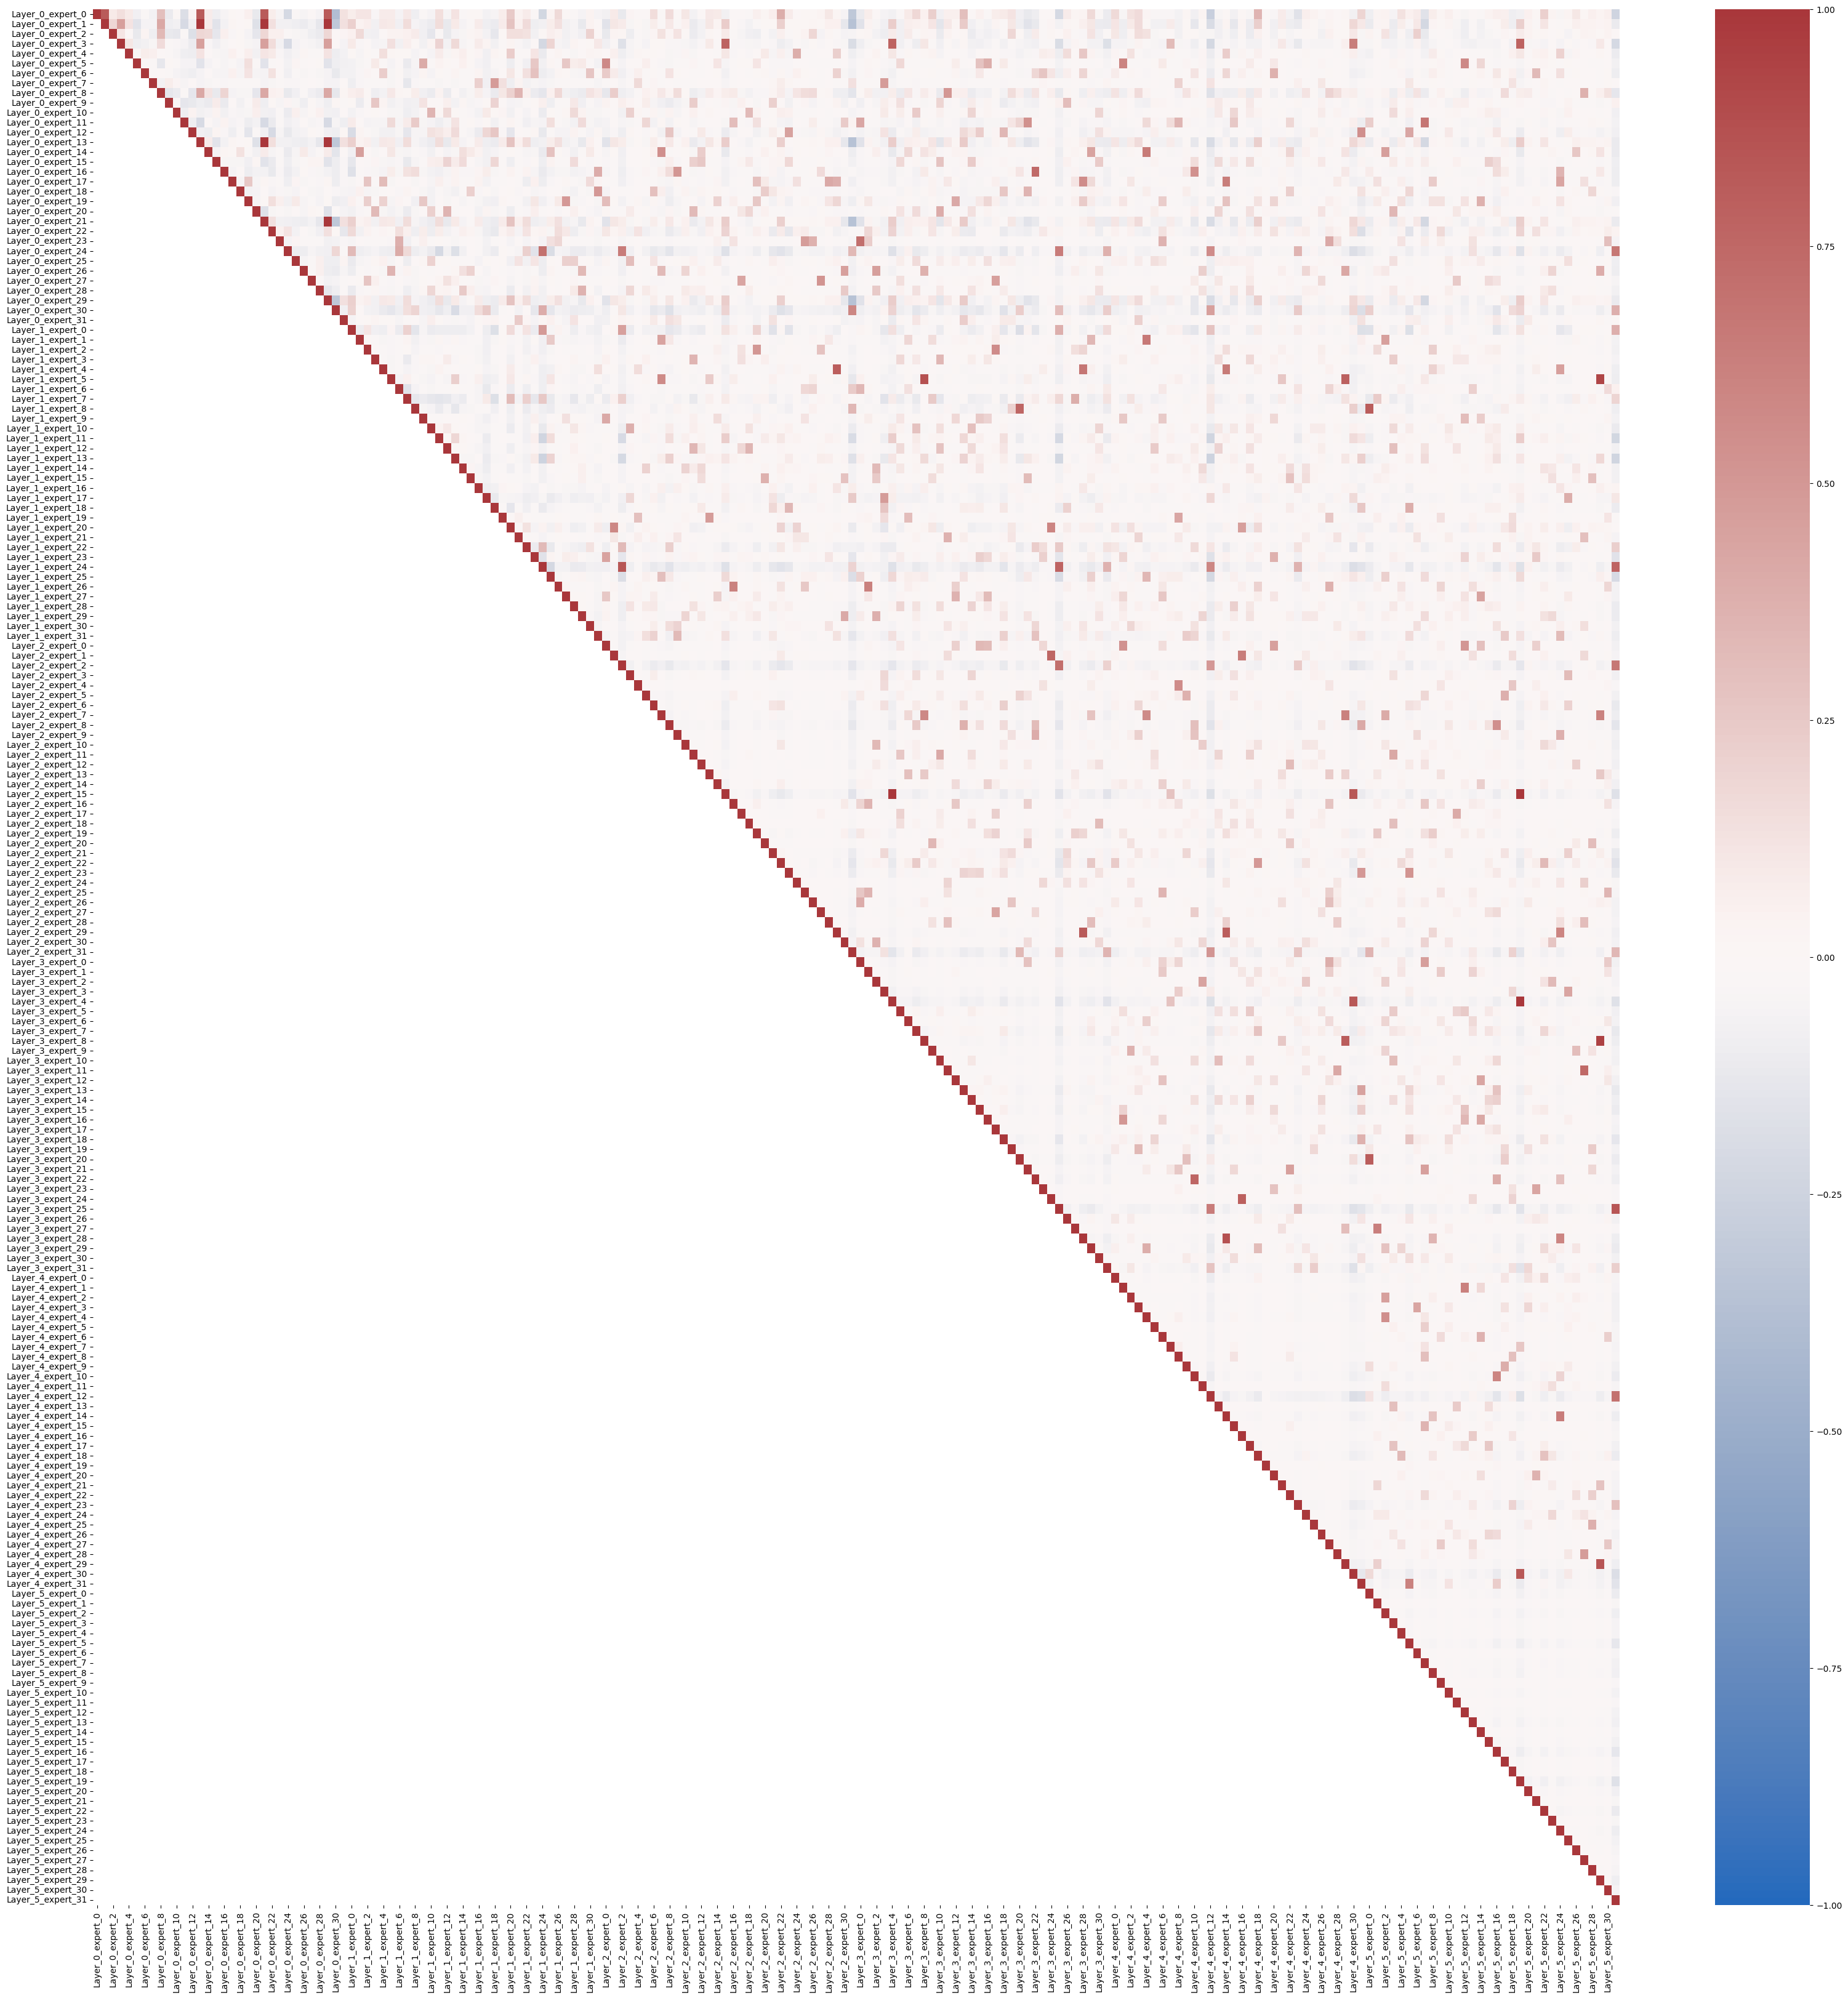

In [50]:
plt.figure(figsize=(40, 40))

sns.heatmap(expert_logit_corr, cmap='vlag', vmin=-1, vmax=1)

## Batchwise Expert activated


In [117]:
num_samples = 50
# num_samples = 1

data = []
num_expert_layers = 6
for batch_size in [1,2,3,4,6,8,12,16,32]:
    print(batch_size)
    samplewise_experts_activated = []
    for _ in range(num_samples):
        each_sample_exp_activated_list = []
        for E in range(num_expert_layers):
            num_unique_experts = top_experts_selected.sample(n=batch_size).explode([f'layer_{E}_topk_experts'])[f'layer_{E}_topk_experts'].nunique()
            each_sample_exp_activated_list.append(num_unique_experts)
        samplewise_experts_activated.append(each_sample_exp_activated_list)
    data.append([batch_size] + np.mean(samplewise_experts_activated, axis=0).tolist())

1
2
3
4
6
8
12
16
32


In [118]:
batch_wise_experts_activated = pd.DataFrame(data, columns=['Batch', 'Layer 0', 'Layer 1', 'Layer 2', 'Layer 3', 'Layer 4', 'Layer 5'])
plot_df = batch_wise_experts_activated.melt(id_vars=['Batch'], var_name='Layer Num', value_name='Experts_Activated')
batch_wise_experts_activated

,Batch,Layer 0,Layer 1,Layer 2,Layer 3,Layer 4,Layer 5
0,1,2.00,2.00,2.00,2.00,2.00,2.00
1,2,3.80,3.66,3.66,3.82,3.68,3.86
2,3,5.22,4.92,5.34,5.26,5.36,5.42
3,4,7.00,6.48,6.40,6.64,6.64,7.02
4,6,8.98,8.58,9.16,8.86,9.10,9.50
5,8,10.66,10.24,10.74,11.24,11.20,12.12
6,12,14.28,12.82,13.46,13.86,14.34,15.38
7,16,16.44,14.92,15.34,16.98,17.20,18.38
8,32,22.86,20.60,20.68,22.74,22.52,23.56


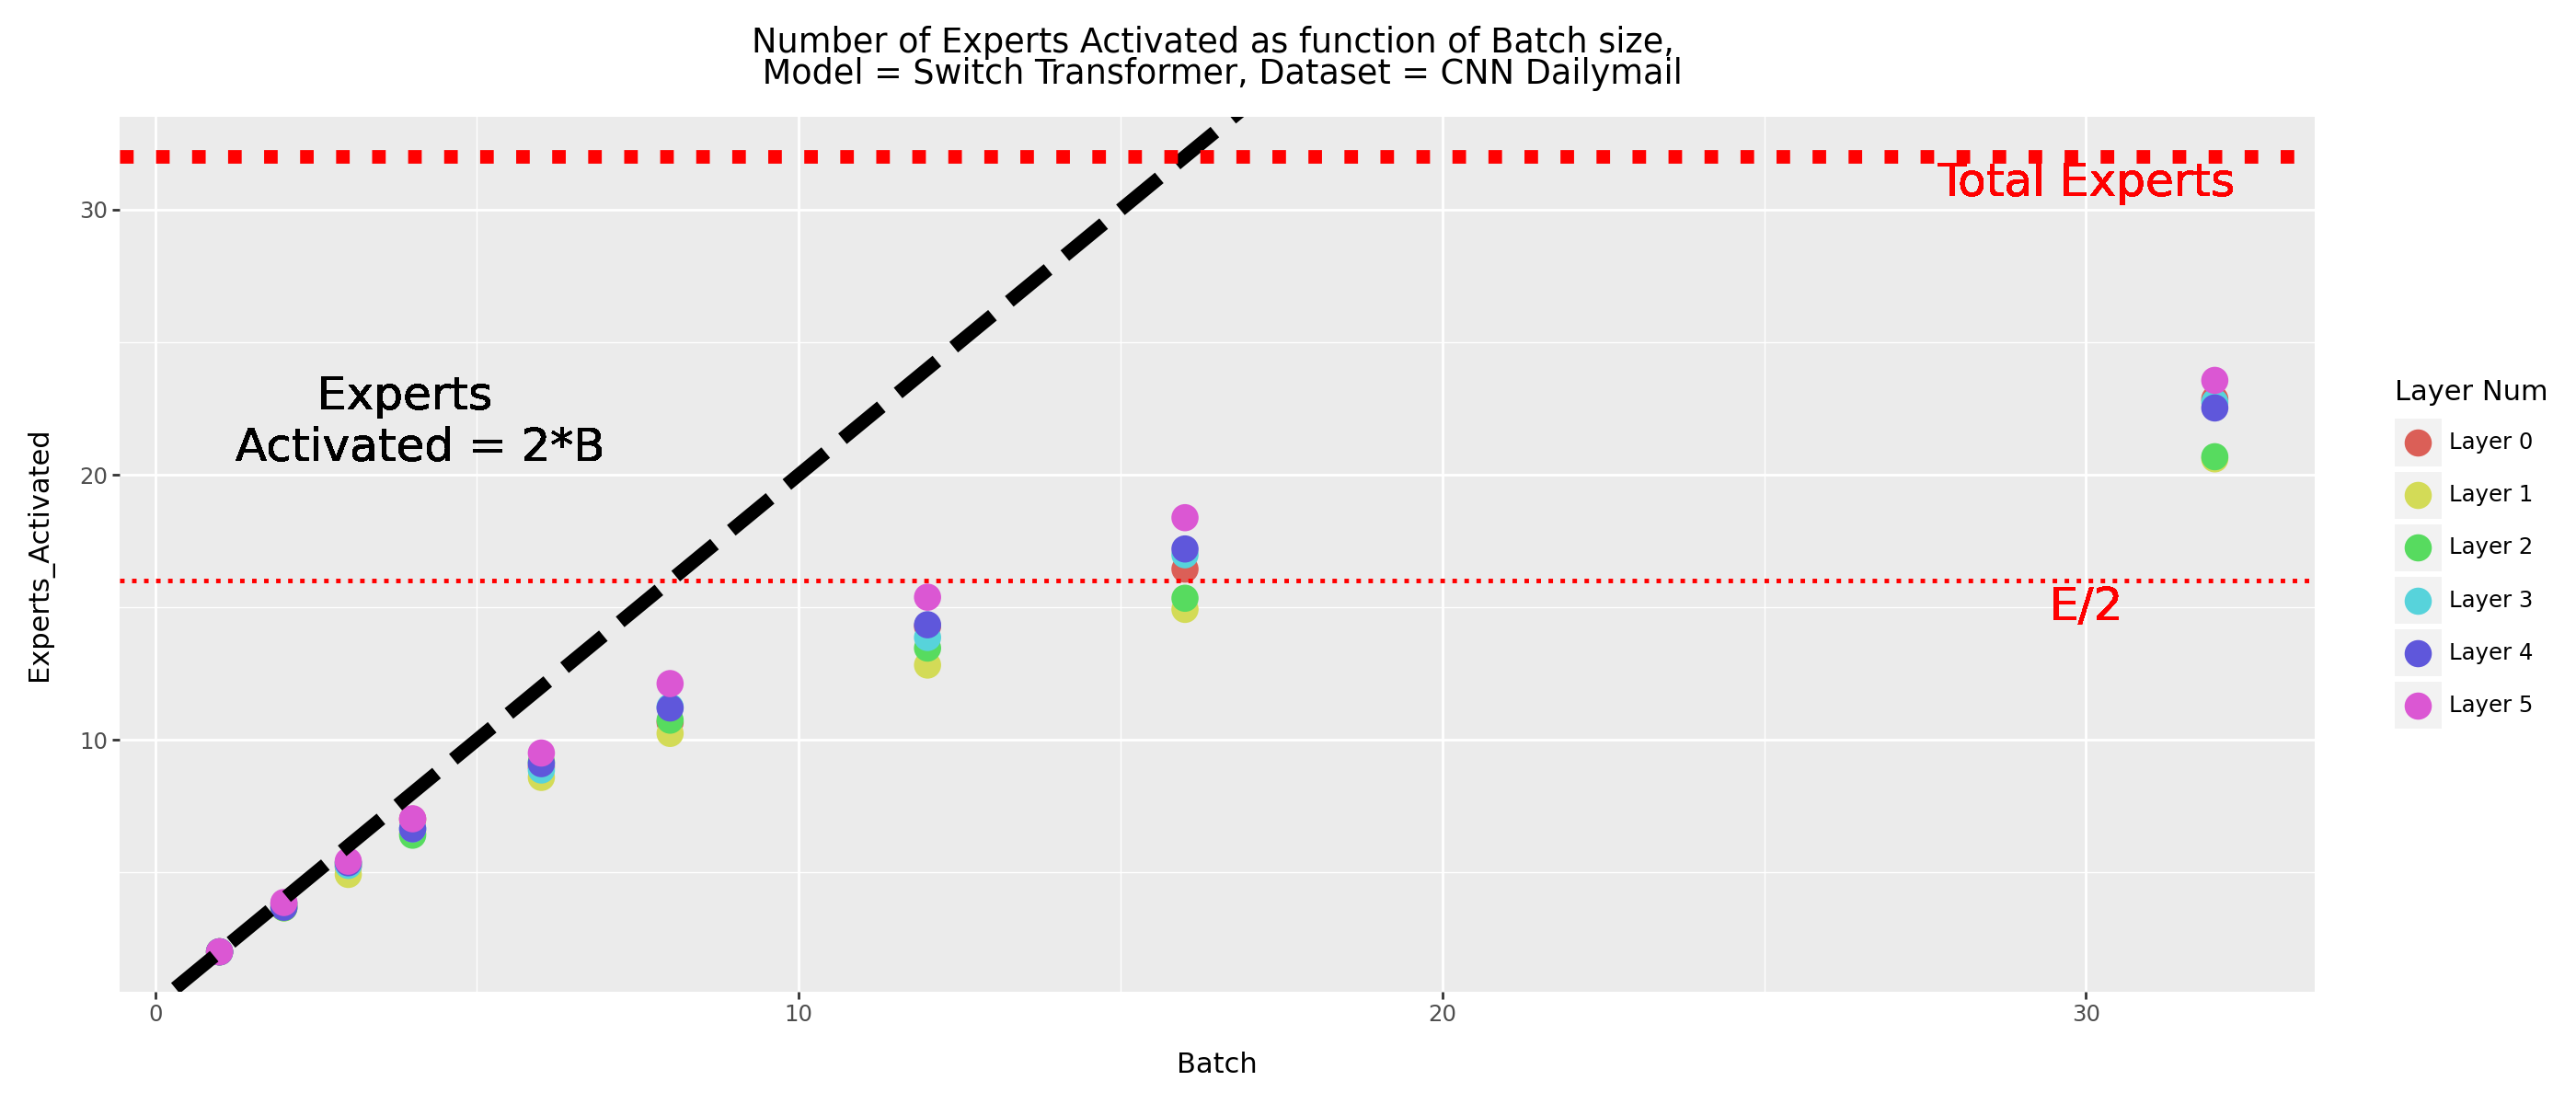

/nethome/abambhaniya3/.conda/envs/moe_scheduler/lib/python3.12/site-packages/plotnine/ggplot.py:606: PlotnineWarning: Saving 14 x 6 in image.
/nethome/abambhaniya3/.conda/envs/moe_scheduler/lib/python3.12/site-packages/plotnine/ggplot.py:607: PlotnineWarning: Filename: ./experts_activated_vs_batch.png


In [119]:
# data_df = pd.DataFrame(data, columns = ['Beam_merge','Batch', 'Latency(s)', 'Tokens/s', "Runtime breakdown"])
p1 = (
    p9.ggplot(plot_df, p9.aes(x='Batch', y='Experts_Activated'))
    + p9.labs(title='Number of Experts Activated as function of Batch size,\n Model = Switch Transformer, Dataset = CNN Dailymail')
    + p9.geom_point(p9.aes(color='Layer Num'), size=5) # line plot
    # + p9.geom_line(p9.aes(x=np.linspace(1, 32, 100), y = ))
    + p9.theme(figure_size=(14, 6))
    + p9.geom_abline(intercept=0,  # set the y-intercept value
                     slope=2,  # set the slope value
                     size = 3, linetype='dashed')
    + p9.geom_text(x=4, y = 22, label='Experts \n Activated = 2*B',size = 18)
    + p9.geom_hline(yintercept=16,  color='red', size = 1, linetype='dotted')
    + p9.geom_text(x=30, y = 15,  color='red',size = 18, label='E/2')

    + p9.geom_hline(yintercept=32,  color='red', size = 3, linetype='dotted')
    + p9.geom_text(x=30, y = 31,  color='red',size = 18, label='Total Experts')
   #  + p9.facet_wrap("Layer Num", scales = 'free', ncol=6)
)
p1.show()
p9.ggsave(p1, './experts_activated_vs_batch.png', dpi=500)

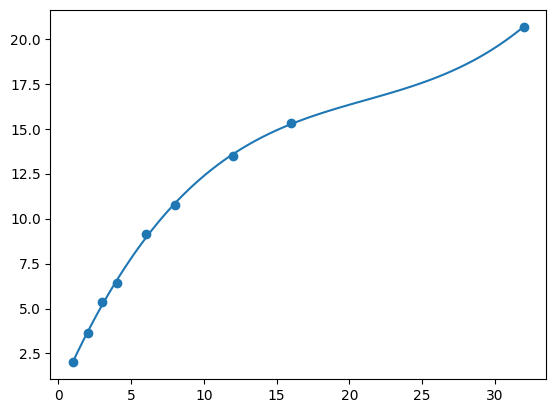

In [120]:
import numpy
import matplotlib.pyplot as plt

x = batch_wise_experts_activated['Batch']
y = batch_wise_experts_activated['Layer 2']

mymodel = numpy.poly1d(numpy.polyfit(x, y, 3))

myline = numpy.linspace(1, 32, 100)

plt.scatter(x, y)
plt.plot(myline, mymodel(myline))
plt.show()

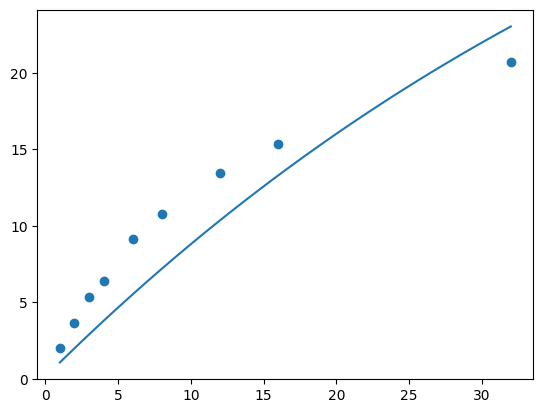

In [121]:
mymodel.order, mymodel, mymodel.c
def model_temp(x):
    return 3.39111515e-05*x**3 - 8.29755187e-03*x**2 +  9.46276455e-01*x + 1.27821751e-01

plt.scatter(x, y)
plt.plot(myline, model_temp(myline))
plt.show()

# Expert Activation Frequency

In [122]:
top_experts_selected

,Unnamed: 0,id,num_output_tokens,Generated Token Num,sequences,layer_0_topk_experts,layer_1_topk_experts,layer_2_topk_experts,layer_3_topk_experts,layer_4_topk_experts,layer_5_topk_experts
0,0,f001ec5c4704938247d27a44948eebb37ae98d01,43,0,tensor(0),"[11, 2]","[13, 25]","[16, 19]","[21, 0]","[22, 8]","[7, 25]"
1,1,f001ec5c4704938247d27a44948eebb37ae98d01,43,1,tensor(32099),"[1, 13]","[11, 0]","[22, 10]","[29, 7]","[18, 0]","[22, 8]"
2,2,f001ec5c4704938247d27a44948eebb37ae98d01,43,2,tensor(5),"[24, 30]","[24, 0]","[2, 31]","[25, 31]","[23, 12]","[31, 18]"
3,3,f001ec5c4704938247d27a44948eebb37ae98d01,43,3,tensor(41),"[11, 2]","[8, 17]","[31, 22]","[20, 6]","[30, 9]","[0, 20]"
4,4,f001ec5c4704938247d27a44948eebb37ae98d01,43,4,tensor(254),"[16, 30]","[31, 20]","[5, 21]","[20, 18]","[9, 5]","[17, 0]"
...,...,...,...,...,...,...,...,...,...,...,...
448889,47,d75cef6cb7025d22eb308d39b5ae29e480902c91,52,47,tensor(6),"[7, 2]","[21, 8]","[31, 4]","[3, 26]","[23, 8]","[18, 8]"
448890,48,d75cef6cb7025d22eb308d39b5ae29e480902c91,52,48,tensor(62),"[16, 11]","[17, 13]","[27, 22]","[22, 29]","[10, 24]","[27, 24]"
448891,49,d75cef6cb7025d22eb308d39b5ae29e480902c91,52,49,tensor(22),"[12, 10]","[17, 7]","[21, 23]","[3, 31]","[28, 0]","[25, 20]"
448892,50,d75cef6cb7025d22eb308d39b5ae29e480902c91,52,50,tensor(60),"[17, 14]","[16, 17]","[29, 6]","[28, 26]","[14, 24]","[24, 12]"


In [133]:
num_expert_layers = 6
value_counts_df = pd.DataFrame()
for E in range(num_expert_layers):
    num_experts_count = top_experts_selected.explode([f'layer_{E}_topk_experts'])[f'layer_{E}_topk_experts'].value_counts().reindex(range(32), fill_value=0)
    value_counts_df[f'{E}_counts'] = num_experts_count
value_counts_df = value_counts_df.fillna(0)


In [143]:
value_counts_df/len(top_experts_selected)

,0_counts,1_counts,2_counts,3_counts,4_counts,5_counts
layer_0_topk_experts,,,,,,
0,0.058361,0.139884,0.029963,0.031453,0.125308,0.125301
1,0.095793,0.033707,0.018728,0.018871,0.025919,0.027855
2,0.156326,0.024364,0.166351,0.017285,0.048764,0.042981
3,0.065125,0.013596,0.043217,0.063572,0.033609,0.035414
4,0.016997,0.026986,0.008730,0.109244,0.026585,0.050010
5,0.023271,0.035706,0.020778,0.033387,0.028305,0.108986
6,0.037762,0.032887,0.098302,0.069157,0.022304,0.020495
7,0.017267,0.229702,0.043347,0.085330,0.074271,0.034886
8,0.021591,0.061101,0.100142,0.041121,0.018686,0.128817


In [138]:
min(value_counts_df[:].min())

2567

<Axes: ylabel='layer_0_topk_experts'>

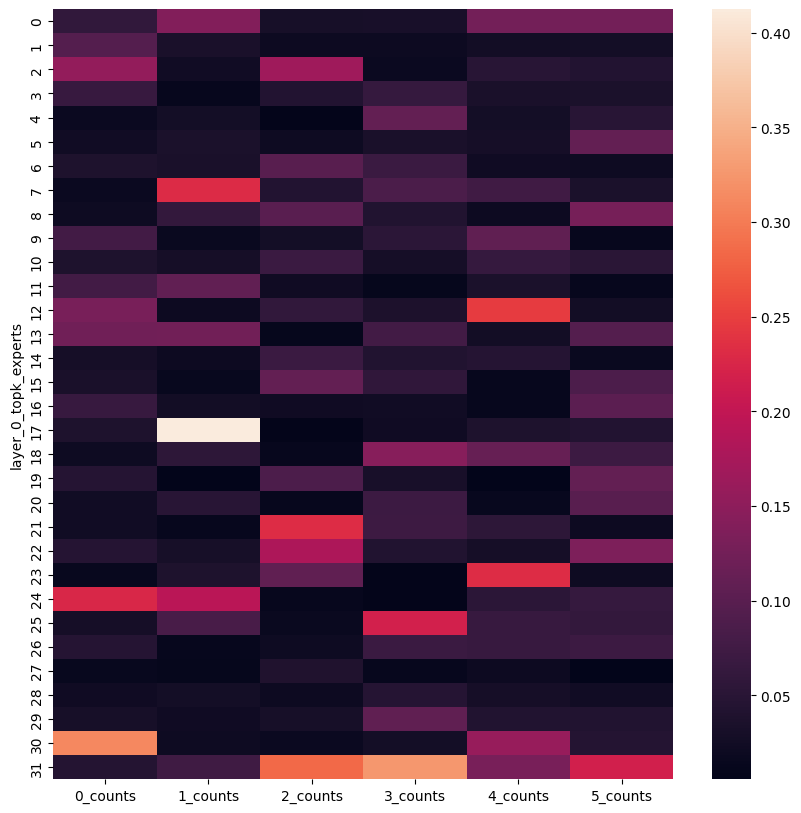

In [147]:
plt.figure(figsize=(10, 10))

sns.heatmap(value_counts_df/len(top_experts_selected))

### Expert Prediction

#### Linear Regression


In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import tree
import matplotlib.pyplot as plt

0 - 31 : Layer 0 <br>
32 - 63 : Layer 1 <br>
64 - 95 : Layer 2 <br>
96 - 127 : Layer 3 <br>
128 - 159 : Layer 4 <br>
160 - 191 : Layer 5 <br>

In [55]:
top_experts_selected[top_experts_selected.columns[9]].explode('layer_4_topk_experts').reset_index(drop=True)

0          [22, 8]
1          [18, 0]
2         [23, 12]
3          [30, 9]
4           [9, 5]
            ...   
448889     [23, 8]
448890    [10, 24]
448891     [28, 0]
448892    [14, 24]
448893      [6, 5]
Name: layer_4_topk_experts, Length: 448894, dtype: object

In [60]:
labels = []
accs = []

for i in range(129, 192):
  target_col = df_router_softmax.columns[i]

  # Split the dataset
  X_train, X_test, y_train, y_test = train_test_split(df_router_softmax[df_router_softmax.columns[:64]], df_router_softmax[df_router_softmax.columns[i]], random_state=0)

  print (X_train.shape)
  print (X_test.shape)

  #print (X_train)

  # Train the model
  clf = LinearRegression()
  clf.fit(X_train, y_train)

  accuracy = clf.score(X_test, y_test)

  labels.append(target_col)
  accs.append(accuracy)

  print(f"Layer: {target_col} | Accuracy: {accuracy}")
  #print("Accuracy:", clf.score(X_test, y_test))


(336670, 64)
(112224, 64)
Layer: Layer_4_expert_1 | Accuracy: 0.39634803616333303
(336670, 64)
(112224, 64)
Layer: Layer_4_expert_2 | Accuracy: 0.12049120800962532
(336670, 64)
(112224, 64)
Layer: Layer_4_expert_3 | Accuracy: 0.14813146791949006
(336670, 64)
(112224, 64)
Layer: Layer_4_expert_4 | Accuracy: 0.672481173824362
(336670, 64)
(112224, 64)
Layer: Layer_4_expert_5 | Accuracy: 0.11635548094568282
(336670, 64)
(112224, 64)
Layer: Layer_4_expert_6 | Accuracy: 0.25562218313668195
(336670, 64)
(112224, 64)
Layer: Layer_4_expert_7 | Accuracy: 0.1501818568593648
(336670, 64)
(112224, 64)
Layer: Layer_4_expert_8 | Accuracy: 0.3899494181483185
(336670, 64)
(112224, 64)
Layer: Layer_4_expert_9 | Accuracy: 0.14399749234691006
(336670, 64)
(112224, 64)
Layer: Layer_4_expert_10 | Accuracy: 0.4406646258682654
(336670, 64)
(112224, 64)
Layer: Layer_4_expert_11 | Accuracy: 0.10252230716589972
(336670, 64)
(112224, 64)
Layer: Layer_4_expert_12 | Accuracy: 0.5592111341266355
(336670, 64)
(11222

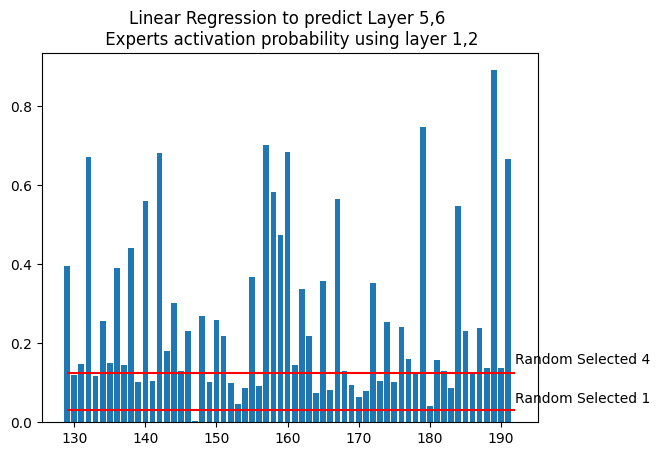

In [45]:
plt.bar(range(129, 192), accs)
plt.hlines(y=1/32, xmin=129, xmax=192, colors='red')
plt.text(x=192, y = 0.05, s='Random Selected 1', )
plt.hlines(y=4/32, xmin=129, xmax=192, colors='red')
plt.text(x=192, y = 0.15, s='Random Selected 4', )
plt.title('Linear Regression to predict Layer 5,6 \n Experts activation probability using layer 1,2')
plt.show()

### MLP

In [69]:
# top_experts_selected[['','layer_5_topk_experts']]
# Concatenating lists from both columns
import ast
def str_to_list(s):
    return ast.literal_eval(s)
# top_experts_selected['layer_4_topk_experts'] = top_experts_selected['layer_4_topk_experts'].apply(str_to_list)
# top_experts_selected['layer_5_topk_experts'] = top_experts_selected['layer_5_topk_experts'].apply(str_to_list)

concatenated_lists = top_experts_selected.apply(lambda row: row['layer_4_topk_experts'].apply(str_to_list) + row['layer_5_topk_experts'].apply(str_to_list), axis=1)

# Converting the concatenated lists to a 2D array


ValueError: malformed node or string: [22, 8]

In [88]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np

# Generate some random data for input and output
X = torch.tensor([row for _, row in df_router_softmax[df_router_softmax.columns[:64]].iterrows()], dtype=torch.float32)
y = torch.tensor(concatenated_lists.tolist(), dtype=torch.float32)    # 100 samples, 2 outputs

# Split the data into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


/tmp/ipykernel_72843/2076559171.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`


In [94]:
# Define the architecture of the MLP
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(64, 128)
        self.fc2 = nn.Linear(128, 128)
        self.fc3 = nn.Linear(128, 128)
        self.fc4 = nn.Linear(128, 4)
    
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = self.fc4(x)

        return x

# Initialize the model
model = MLP()

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters())
# Lists to store loss values
train_losses = []
val_losses = []

# Train the model for a few iterations
epochs = 150
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()
    train_losses.append(loss.item())

    # Validate the model
    if epoch%10 == 0:
        model.eval()
        with torch.no_grad():
            val_outputs = model(X_val)
            val_loss = criterion(val_outputs, y_val)
            val_losses.append(val_loss.item())

    
    print(f'Epoch [{epoch+1}/{epochs}], Train Loss: {loss.item()}, Validation Loss: {val_loss.item()}')

# Evaluate the model on the test set
model.eval()
with torch.no_grad():
    test_outputs = model(X_test)
    test_loss = criterion(test_outputs, y_test)
    
print(f'Test Loss: {test_loss.item()}')

Epoch [1/150], Train Loss: 367.572265625, Validation Loss: 367.4338073730469
Epoch [2/150], Train Loss: 367.1158447265625, Validation Loss: 367.4338073730469
Epoch [3/150], Train Loss: 366.64617919921875, Validation Loss: 367.4338073730469
Epoch [4/150], Train Loss: 366.1596374511719, Validation Loss: 367.4338073730469
Epoch [5/150], Train Loss: 365.6416015625, Validation Loss: 367.4338073730469
Epoch [6/150], Train Loss: 365.08367919921875, Validation Loss: 367.4338073730469
Epoch [7/150], Train Loss: 364.47479248046875, Validation Loss: 367.4338073730469
Epoch [8/150], Train Loss: 363.8038330078125, Validation Loss: 367.4338073730469
Epoch [9/150], Train Loss: 363.0638122558594, Validation Loss: 367.4338073730469
Epoch [10/150], Train Loss: 362.23828125, Validation Loss: 367.4338073730469
Epoch [11/150], Train Loss: 361.3053283691406, Validation Loss: 360.5517883300781
Epoch [12/150], Train Loss: 360.2391357421875, Validation Loss: 360.5517883300781
Epoch [13/150], Train Loss: 359.01

In [95]:
print(f"Accuracy : {test_outputs.eq(y_test).float().mean()}")


Accuracy : 0.0


In [90]:
model

MLP(
  (fc1): Linear(in_features=64, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=128, bias=True)
  (fc4): Linear(in_features=128, out_features=4, bias=True)
)

In [93]:
model(X_train)

In [96]:
test_outputs, y_test

(tensor([[19.1272, 17.4317, 19.7089, 16.0790],
         [18.1859, 16.5756, 18.7505, 15.2898],
         [20.4767, 18.6482, 21.1124, 17.2156],
         ...,
         [16.9352, 15.4324, 17.4625, 14.2309],
         [17.1809, 15.6598, 17.7144, 14.4441],
         [16.4515, 14.9969, 16.9621, 13.8213]]),
 tensor([[31., 10.,  5., 16.],
         [31., 19., 16., 22.],
         [23.,  2., 20., 22.],
         ...,
         [ 7., 30., 19.,  6.],
         [31., 24.,  5., 15.],
         [31., 26., 16., 15.]]))

In [99]:
# Convert integer labels to one-hot encoding
y = torch.tensor(np.random.randint(0, 32, size=(1000,)), dtype=torch.long)  # 1000 samples, integer labels
print(y)
y_onehot = nn.functional.one_hot(y, num_classes=32)
print(y_onehot)

tensor([18, 10,  4, 29, 14, 19,  8,  7,  8, 16, 28, 14, 13, 29, 24, 17,  3, 17,
        25,  7, 21, 22, 19, 20, 20, 30, 24,  9, 11, 18, 13, 30, 19, 25, 30, 31,
        23, 23, 26, 25,  3, 27, 17, 19, 28,  0, 20,  1, 30, 10, 15,  4,  2, 22,
        12, 17, 10, 18, 22,  3,  0, 20,  6, 25, 18,  9, 31, 30,  3, 26,  3,  6,
         7, 27, 22, 10,  8, 12, 19, 15,  0, 21, 14,  4,  8, 23, 31, 16, 27, 29,
        22, 16,  6, 10,  2,  7, 30, 22, 10, 31, 21, 22,  3,  9,  4, 21, 20, 22,
        19, 26, 20, 22,  9,  0, 10, 13,  4, 19,  6,  9, 14, 25, 10, 26,  9, 12,
         0, 20, 23, 12,  0, 29,  1, 11, 13, 25, 24, 23, 29,  1, 31,  4, 14, 19,
         3,  8, 12,  0, 12, 12, 24,  5, 13, 22, 17, 17,  4, 16,  0,  8,  8,  9,
        24, 29, 27, 24, 24, 26,  4, 23,  5, 20, 25,  5, 30,  4,  5, 16, 18, 18,
        20, 26,  2, 24, 13, 12,  1,  5, 27, 31,  9, 27, 12,  1,  6,  9,  9,  2,
        23, 12, 13,  3, 27, 18, 24, 12, 30, 20, 16, 20, 16, 14, 18,  1,  9, 14,
        13, 20,  7, 10, 24, 13, 20, 31, 